# Annual Water Usage in Baltimore
## by Febi Andika Dani Fajar Suryawan

## Background
The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data. The values are in the units of liters per capita per day, and there are 79 observations.

## Import Library

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('water.csv', delimiter=';')
df.head()

,Year,Annual water use
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [3]:
# Rename columns
rename={'Year':'year',
        'Annual water use':'annual_use'}
df.rename(columns=rename, inplace=True)

In [4]:
#Split data into 2, for model development and validation
batas = len(df) - 20
dataset, validation = df[0:batas], df[batas:]
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

## 2. Create summary of the dataset, with python function

In [5]:
# Use dataset to model development and create the summary of the dataset
df = dataset.copy()
df.describe()

,year,annual_use
count,59.000000,59.000000
mean,1914.000000,485.288136
std,17.175564,68.033473
min,1885.000000,344.000000
25%,1899.500000,454.000000
50%,1914.000000,485.000000
75%,1928.500000,509.000000
max,1943.000000,662.000000


## 3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem

Text(0.5,1,'Annual Use of Water in Baltimore')

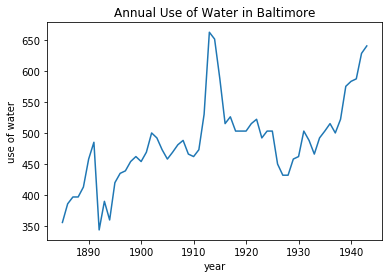

In [6]:
# Create a line plot of a time series dataset
plt.plot(df['year'], df['annual_use'])
plt.xlabel('year')
plt.ylabel('use of water')
plt.title('Annual Use of Water in Baltimore')

We can see that the time series plot of annual water usage data in Baltimore fluctuates every year.

## 4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing

In [7]:
# Make year column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [8]:
# Grouping year to decade
df = df.set_index(df['year'])
groups = df.loc['1885':'1935'].groupby(pd.Grouper(freq='10AS')).mean()
groups

,annual_use
year,
1885-01-01,398.6
1895-01-01,459.8
1905-01-01,514.0
1915-01-01,516.9
1925-01-01,468.6
1935-01-01,503.0


Text(0.5,1,'Decade Use of Water in Baltimore')

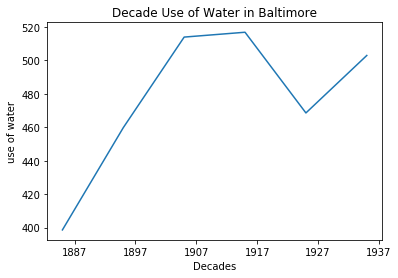

In [9]:
# Plot annual water user for each decade
plt.plot(groups.index, groups['annual_use'])
plt.xlabel('Decades')
plt.ylabel('use of water')
plt.title('Decade Use of Water in Baltimore')

We can see that the time series plot of decade water used average data in Baltimore tends to increase every decade with the highest value on 1915. But there was a decrease in the 1925 decade.

## 5. Create models using ARIMA

### 1. Split the dataset into train and test

In [10]:
# Drop year column
df.drop(columns=['year'], inplace=True)

In [172]:
# Split data to train and test
df = df.astype('float64')
train_size = int(len(df)*0.8)
train = df[0:train_size]
test = df[train_size:]

### 2. Use an ARIMA(0,1,0) on the raw data may be a good starting point

In [54]:
# Make ARIMA(0,1,0) model
arima_order = (0,1,0)
arima = ARIMA(train, order=arima_order)
arima_fit = arima.fit()

### 3. Prediction

In [55]:
# Prediction of model
y_pred = arima_fit.forecast(len(test))[0]
df_test = pd.DataFrame(y_pred, columns=['prediksi'], index=test.index)
df_test['actual'] = test.values
df_test

,prediksi,actual
year,,
1932-01-01,506.195652,488.0
1933-01-01,509.391304,466.0
1934-01-01,512.586957,492.0
1935-01-01,515.782609,503.0
1936-01-01,518.978261,515.0
1937-01-01,522.173913,500.0
1938-01-01,525.369565,522.0
1939-01-01,528.565217,575.0
1940-01-01,531.760870,583.0


## 6. Calculate RMSE

In [174]:
# Calculate the RMSE
mse = mean_squared_error(df_test['actual'], df_test['prediksi'])
rmse = np.sqrt(mse)
print('RMSE = ',rmse)

RMSE =  48.832206147970616


## 7. Based on own model

### 1. Loading Dataset

In [157]:
# Load dataset
data = dataset.copy()
data.head()

,year,annual_use
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [158]:
# Change format of year column
data['year'] = pd.to_datetime(data['year'], format='%Y')

In [159]:
# Set index
data = data.set_index(data['year'])
data.drop(columns=['year'], inplace=True)

### 2. Rolling Mean and Standard Deviation

In [121]:
# Calculate rolling mean and standar deviation
rolmean = data.rolling(window = 4).mean()
rolstd = data.rolling(window = 4).std()

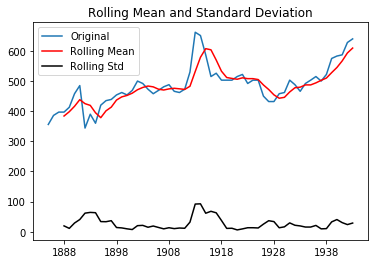

In [122]:
# Plotting rolling mean and standar deviation
orig = plt.plot(data, label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

In [123]:
# Dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ("Result of Dickey-Fuller Test:")
dftest = adfuller(data["annual_use"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -1.833141
p-value                        0.364136
#Lags Used                     2.000000
Number of Observation Used    56.000000
Critical Value (1%)           -3.552928
Critical Value (5%)           -2.914731
Critical Value (10%)          -2.595137
dtype: float64


We get that based on the dickey fuller test, the value of p value is greater than 0.05 (the data can be said to be stationary when the p-value is below 0.05) so it can be said that the data is not stationary. We will do data differencing to stationate data.

### 3. Stasionarize the Data

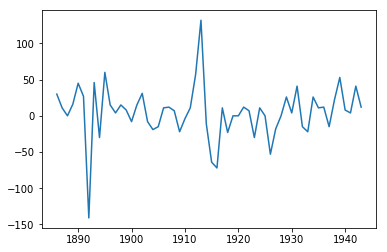

In [124]:
# Do data differencing
data_diff=data-data.shift()
plt.plot(data_diff)

In [125]:
# Drop null values
data_diff=data_diff.dropna()

In [126]:
# Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
print ("Result of Dickey-Fuller Test:")
dftest = adfuller(data_diff["annual_use"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -5.615617
p-value                        0.000001
#Lags Used                     1.000000
Number of Observation Used    56.000000
Critical Value (1%)           -3.552928
Critical Value (5%)           -2.914731
Critical Value (10%)          -2.595137
dtype: float64


We get that based on the dickey fuller test, the value of p value is less than 0.05 (the data can be said to be stationary when the p-value is below 0.05) so it can be said that the data is stationary.

### 4. Set the Value of p and q Based on ACF and PACF Plotting

<function matplotlib.pyplot.show>

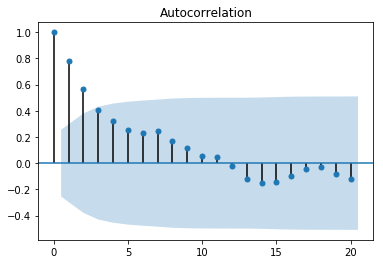

In [127]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags = 20)
plt.show

<function matplotlib.pyplot.show>

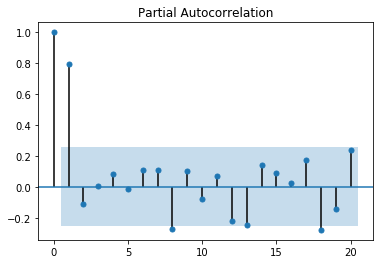

In [128]:
# Plot PACF
plot_pacf(data, lags = 20)
plt.show

From the ACF and PACF plots we get that the ACF plot has sinusoidal shape and the PACF plot has cut off after lag-1 so the ARIMA (1,1,0) model is used to create a time series model.

### 5. ARIMA Modelling

In [175]:
# Split data to train and test
data = data.astype('float64')
train_size = int(len(data)*0.8)
train = data[0:train_size]
test = data[train_size:]

# Make ARIMA(1,1,0) model
arima_order = (1,1,0)
arima = ARIMA(train, order=arima_order)
arima_fit = arima.fit()

In [170]:
# Prediction of model
y_pred = arima_fit.forecast(len(test))[0]
data_test = pd.DataFrame(y_pred, columns=['prediksi'], index=test.index)
data_test['actual'] = test.values
data_test

,prediksi,actual
year,,
1932-01-01,507.213533,488.0
1933-01-01,510.471930,466.0
1934-01-01,513.705527,492.0
1935-01-01,516.938480,503.0
1936-01-01,520.171416,515.0
1937-01-01,523.404352,500.0
1938-01-01,526.637288,522.0
1939-01-01,529.870223,575.0
1940-01-01,533.103159,583.0


### 7. Calculate the RMSE from the Model

In [176]:
# Calculate the RMSE
mse = mean_squared_error(data_test['actual'], data_test['prediksi'])
rmse = np.sqrt(mse)
print('RMSE = ',rmse)

RMSE =  48.27788650592981


### 8. Plotting Predict vs Actual

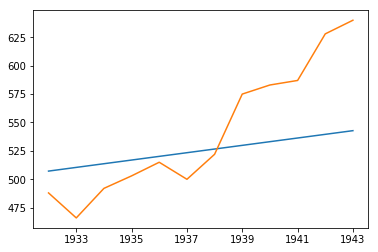

In [185]:
# Plotting Predict vs Actual
plt.plot(data_test['prediksi'])
plt.plot(data_test['actual'])

### 9. Predict for Next Ten Period

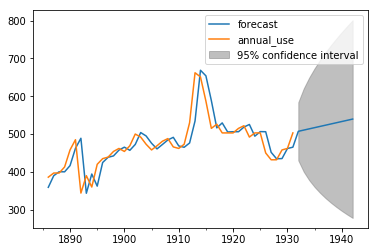

In [193]:
# Plot predict for next ten period
arima_fit.plot_predict(1,57)
x = arima_fit.forecast(steps = 80)

In [196]:
# Forecast values for next ten period
fc, se, conf = arima_fit.forecast(10, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc)
fc_series

0    507.213533
1    510.471930
2    513.705527
3    516.938480
4    520.171416
5    523.404352
6    526.637288
7    529.870223
8    533.103159
9    536.336095
dtype: float64

We find that the predicted results of annual water usage in Baltimore tend to increase every year compared to previous years.

## 8. Conclusion

1. From the annual water usage data in Baltimore, a model that matches that data is ARIMA(1,1,0).
2. We get that the RMSE value from the model ARIMA(1,1,0) is 48.28, so we can tell that the error/the model was wrong/gap between prediction and actual value per capita per day for each prediction made is 48.28 liters per capita per day.